In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
flat_data = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(224,224))
    
    images.append(image_resized)
    flat_data.append(image_resized.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.3,random_state=109)


In [3]:
X_train.shape

(112, 224, 224, 3)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [45]:
base_model.trainable = False

In [46]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(4, activation="softmax")                                     
                                ])

In [47]:
model

In [48]:
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [50]:
history=model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 32),
 validation_data = (X_test, y_test), steps_per_epoch = len(X_train) // 32,
 epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/3 [==============================] - 9s 2s/step - loss: 1.8621 - accuracy: 0.0938 - val_loss: 1.4068 - val_accuracy: 0.2917
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.6511 - accuracy: 0.2495 - val_loss: 1.1740 - val_accuracy: 0.4792
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 1.1110 - accuracy: 0.4740 - val_loss: 0.9930 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 1.0098 - accuracy: 0.6312 - val_loss: 0.8269 - val_accuracy: 0.7292
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 1.0121 - accuracy: 0.6510 - val_loss: 0.7123 - val_accuracy: 0.7292
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.7767 - accuracy: 0.7318 - val_loss: 0.6354 - val_accuracy: 0.7708
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.7012 - accuracy: 0.7333 - val_loss: 0.5761 - val_accuracy: 0.7708
Epoch 8/10
3/3 [=========================

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('ricemodel_mobile.h5')

In [52]:
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[[1.81760117e-02 4.01836038e-02 1.01651654e-01 8.39988708e-01]
 [7.85988927e-01 1.18896112e-01 3.20402198e-02 6.30748272e-02]
 [5.20153791e-02 1.16219282e-01 2.70781904e-01 5.60983419e-01]
 [9.60150361e-01 2.79162657e-02 2.97036325e-03 8.96299910e-03]
 [1.52729414e-02 5.24232676e-03 8.51150215e-01 1.28334418e-01]
 [4.39662248e-01 2.84465045e-01 3.46925221e-02 2.41180167e-01]
 [8.63873839e-01 6.01709262e-02 2.73042247e-02 4.86510508e-02]
 [7.65366945e-03 9.00491416e-01 4.43669185e-02 4.74880524e-02]
 [6.34844182e-03 2.84805186e-02 5.24593294e-01 4.40577775e-01]
 [1.90514699e-02 8.06896806e-01 6.07959665e-02 1.13255709e-01]
 [3.89794470e-03 1.73554450e-01 9.21831280e-02 7.30364442e-01]
 [1.58828851e-02 3.87655720e-02 7.26500154e-02 8.72701526e-01]
 [7.95266330e-02 9.99754891e-02 2.30363071e-01 5.90134859e-01]
 [2.26426143e-02 1.36388078e-01 3.11089903e-01 5.29879332e-01]
 [9.67771649e-01 1.11859450e-02 4.44582850e-03 1.65966004e-02]
 [1.40997313e-03 7.74730206e-01 1.849

In [57]:
imagetest=skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot/DSC_0108.jpg')
img_resized = resize(imagetest,(224,224))

In [59]:
img_resized.shape

(224, 224, 3)

In [70]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob
import os


def load_image(filename):
    img = cv2.imread(os.path.join(filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img

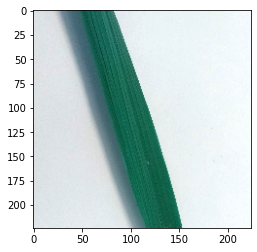

Predicted Disease is Healthy


In [78]:
import matplotlib.pyplot as plt


%matplotlib inline
img = load_image('/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190420_200436.jpg')
p = model.predict(np.asarray([img]))[0]
plt.imshow(img)    
plt.show()
k = target_names
class_idx = np.argmax(p)
s = [str(i) for i in p] 
a = int(class_idx) 
print("Predicted Disease is", k[a])